# GAN : Generative Adversarial Neworks
- Generative model 생성모델

## 기본
- 확률분포 : 확률 변수가 특정한 값을 가질수 있는 확률을 나타내는 함수
- $X->P(X=x)$
- 이산확률 분포 : 확률변수 X의 개수를 `정확히 셀 수 있을 때` 이산확률 분포라고 말한다.
- 연속확률 분포 : 확률변수 X의 개수를 `정확히 샐 수 없을 때` 연속확률분포라 말한다.(확률 밀도 함수를 이용해 분포를 표현)
    - ex : 정규분포
    - 실제 세계의 많은 데이터는 정규분포로 표현 할 수 있다.
    - ex : IQ에 대한 정규분포 예시

![normal distribution](img/gan_1.png)

- 이미지 데이터에 대한 확률 분포
    - 이미지 데이터는 다차원 특징 공간의 한 점으로 표현가능하다.
        - 이미지의 분포를 근사하는 모델을 학습할 수 있다.
    - 사람의 얼굴에는 `통계적인 평균치`가 존재할 수 있다.
        - 모델은 이를 수치적으로 표현할 수 있게 된다.
        - ex) 눈의길이, 코의 높이 및 길이 등등
- 이지에서의 다양한 특징들이 각각의 확률 변수가 되는 분포를 의미한다.
    - 다변수 확률분포(multivariate probability distributuin)의 예시는 다음과 같다.
    
![normal distribution](img/gan_2.png)

- 기댓값 공식
- 이산확률변수 : $E[X]=\sum_{i}{x\cdot f(x_i)}$
- 이산확률변수 : $E[X]=\int{x\cdot f(x_i)}$


> 생성모델(Generative Models)
    - 생성 모델은 실존하지 않지만 있을 법한 이미지를 생성할 수 있는 모델을 의미한다.

![normal distribution](img/gan_3.png)

- 일반적인 분류 모델(어떻게 선을 만들까?) vs 생성모델(각각의 data의 분포를 학습)
- joint probability distribution 통계적 모델로 설명가능하다.
- data instances(사진한장) 구별되는 데이터 객체를 생성가능하다.
- 잘학습하면 통계적인 학습치를 학습할 수 있다.
- 확률값이 높은 이미지 -> 잘 만든다.
- 확률값이 낮은 이미지 -> 덜 학습되어 어색한 이미지를 생성한다.
- 따라서 확률값이 낮은 이미지 분포에서는 random하게 sample하고 noise를 섞어가면서 image를 만든다.

> Goal
    - 이미지 데이터 분포를 근사하는 분포를 근사하는 모델 G를 만드는 것이 생성 모델의 목표
    - 모델 G가 잘 동작한다는 의미는 원래 이미지들의 분포를 잘 모델링 할 수 있다는 것을 의미한다.
        - 2014년에 제안된 Generative Adversarial Networks(GAN)이 대표적이다.
        - GAN으로부터 매우 다양한 논문들이 파생된다.


![normal distribution](img/gan_4.png)
- 초록색 -> 원본 그래프로의 학습
- 생성모델 G의 분포를 학습시킨다.

- 모델 G의 학습이 잘 되었다면 원본 데이터의 분포를 근사할 수 있다.
    - 학습이 잘 되었다면 통계적으로 평균적인 특징을 가지는 데이터를 쉽게 생성할 수 있습니다.

![normal distribution](img/gan_5.png)

![normal distribution](img/gan_7.png)
- z즉, latent를 학습하고싶다.
- Pg가 어떻게 pdata으로 수렴이 가능한자?
- 원본 데이터의 주변값을 뽑아서 noise를 넣어 뽑아내 가짜 data를 뽑아낸다.

> GAN(Generative Adverial Networks)
- 생성자(generator)와 판별자(discriminator)두 개의 네트워크를 활용한 생성 모델
- 다음의 목적함수(Objective function)을 통해 생성자는 이미지 분포를 학습할 수 있다.

![normal distribution](img/gan_6.png)


- 최종적으로 생성자를 만드는것이다.
- 판별자는 생성자를 도와준다.
- V :objective function ,D:판별자 ,G:생성자
- G(z) : new data instance
- D(x) : probability : a sample came from the real distribution
- $x\sim P_{data}(x)$ : 원본데이터 data set에서 하나를 뽑아 넣는다는 의미
- $z \sim P_{z}(Z)$ : noise를 뽑을 수 있는 sampling distibution
- 뒤의 항이 0에 수렴하도록 학습을 진행하겠다.
- z : latent vector -> noise vector이다.
- game 이론의 optimization

- D혹은 G를 번갈아가면서 훈련시킨다.
- 프로그램상에서 기대값(expected value)을 계산하는 간단한 방법은?
    - 단순히 모든 데이터를 하나씩 확인하여 식에 대입한 뒤에 평균을 계산한다.
- $E_{x\sim P_{data}(x)}[logD(x)]$ :원본 데이터 분포에서 샘플 x를 뽑아 logD(x)의 기댓값 계산
- $E_{z \sim P_{z}}[log(1-D(G(z)))]$ : 노이즈 분포에서 샘플z를 뽑아 log(1-D(G(z)))의 기대값을 계산한다.

> proof(수렴의 증명)
![normal distribution](img/gan_8.png)
- 즉 max값을 갖는 V(G,D)가 존재한다

![normal distribution](img/gan_9.png)
- KL divergence : divergence 쿨벡 레이블러 발산
    - 의의 : 두개의 분포가 있을때 두개의 분포가 얼마나 차이가 나는지 확인하는 용도
- JSD(Jenson-shannon divergence) : distance matric으로 확인이 가능하다. => 동일하면 0을 갖아 -log(4)의 point를 갖을 수 있다.

- GAN은 학습이 어렵다 -> 학습의 안정성이 부족하다.
    - 다양한 수렴 method들이 존재한다
> GAN 알고리즘
![normal distribution](img/gan_10.png)

![normal distribution](img/gan_11.png)

- ref)
- https://github.com/ndb796/Deep-Learning-Paper-Review-and-Practice


In [1]:
from tensorflow.keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import time
import PIL
import numpy as np
from IPython import display
import imageio

In [2]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5 # 이미지를 [-1, 1]로 정규화합니다.

In [3]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-06-04 17:14:47.102093: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-04 17:14:47.102216: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256) # 주목: 배치사이즈로 None이 주어집니다.

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

In [5]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [6]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [7]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

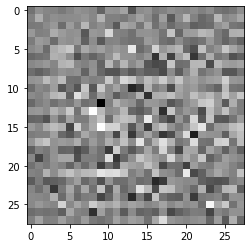

In [8]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [9]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[0.00157987]], shape=(1, 1), dtype=float32)


In [10]:
# 이 메서드는 크로스 엔트로피 손실함수 (cross entropy loss)를 계산하기 위해 헬퍼 (helper) 함수를 반환합니다.
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [11]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [29]:
EPOCHS = 5000000000
noise_dim = 100
num_examples_to_generate = 16

# 이 시드를 시간이 지나도 재활용하겠습니다. 
# (GIF 애니메이션에서 진전 내용을 시각화하는데 쉽기 때문입니다.) 
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [13]:
# `tf.function`이 어떻게 사용되는지 주목해 주세요.
# 이 데코레이터는 함수를 "컴파일"합니다.
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [14]:
def train(dataset, epochs):
    for epoch in range(epochs):
      start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # GIF를 위한 이미지를 바로 생성합니다.
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # 15 에포크가 지날 때마다 모델을 저장합니다.
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)
    
    # print (' 에포크 {} 에서 걸린 시간은 {} 초 입니다'.format(epoch +1, time.time()-start))
    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # 마지막 에포크가 끝난 후 생성합니다.
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                            epochs,
                            seed)

In [15]:
def generate_and_save_images(model, epoch, test_input):
      # `training`이 False로 맞춰진 것을 주목하세요.
  # 이렇게 하면 (배치정규화를 포함하여) 모든 층들이 추론 모드로 실행됩니다. 
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4,4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

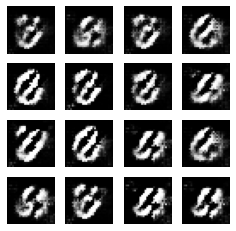

CPU times: user 4min 42s, sys: 6.83 s, total: 4min 48s
Wall time: 4min 59s


In [30]:
%%time
train(train_dataset, EPOCHS)

# gan의 다양한 종류

> DCGAN (depp convolution GAN)
- generator을 de-convolution - CNN을 활용해서 만든다.
- discriminator CNN
- DC GAN의 핵심은 pooling layer을 상요하지않는다.
- convolution-deconvolution-ADAM-batchnormalization
- Latent vector을 통해 arithmetic 산술이 가능해진다.
    - 남자를 생성하는 with 안경 z vector - 남자를 생성하는 latent vector + 여자 latent vector = women with glasses
    - latent vector들간의 선형 결합이 가능해졌다.

> Least Squares GAN(LSGAN)
- gan loss: GAN model that adopts the least squares loss function for the discriminator
- 속이긴했는데 좋지 않는 data -> gradient vanishing을 일으킨다.
![normal distribution](img/gan_12.png)

![normal distribution](img/gan_13.png)


> Semi-supervised GAN
- fake label 생성

![normal distribution](img/gan_14.png)

> Auxiliary Classifier GAN

![normal distribution](img/gan_15.png)
![normal distribution](img/gan_16.png)

# GAN의 확장
> Cycle GAN
![normal distribution](img/gan_17.png)

- image의 domain style변경
- enconder/decoder

![normal distribution](img/gan_18.png)
![normal distribution](img/gan_19.png)

- 안에있는 contents만으로 속인다.

> Stack GAN
- text를 주었을때 그상황에 맞는 image를 준다.
- 한계 고화질이 불가능하다.

